Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Одна из причин популярности линейных методов заключается в том, что они хорошо работают на разреженных данных. Так называются выборки с большим количеством признаков, где на каждом объекте большинство признаков равны нулю. Разреженные данные возникают, например, при работе с текстами. Дело в том, что текст удобно кодировать с помощью "мешка слов" — формируется столько признаков, сколько всего уникальных слов встречается в текстах, и значение каждого признака равно числу вхождений в документ соответствующего слова. Ясно, что общее число различных слов в наборе текстов может достигать десятков тысяч, и при этом лишь небольшая их часть будет встречаться в одном конкретном тексте.

Можно кодировать тексты хитрее, и записывать не количество вхождений слова в текст, а TF-IDF. Это показатель, который равен произведению двух чисел: TF (term frequency) и IDF (inverse document frequency). Первая равна отношению числа вхождений слова в документ к общей длине документа. Вторая величина зависит от того, в скольки документах выборки встречается это слово. Чем больше таких документов, тем меньше IDF. Таким образом, TF-IDF будет иметь высокое значение для тех слов, которые много раз встречаются в данном документе, и редко встречаются в остальных.

Как мы уже говорили выше, линейные методы часто применяются для решения различных задач анализа текстов. В этом задании мы применим метод опорных векторов для определения того, к какой из тематик относится новость: атеизм или космос.

Для начала вам потребуется загрузить данные. В этом задании мы воспользуемся одним из датасетов, доступных в scikit-learn'е — 20 newsgroups. Для этого нужно воспользоваться модулем datasets:

После выполнения этого кода массив с текстами будет находиться в поле newsgroups.data, номер класса — в поле newsgroups.target.

Одна из сложностей работы с текстовыми данными состоит в том, что для них нужно построить числовое представление. Одним из способов нахождения такого представления является вычисление TF-IDF. В Scikit-Learn это реализовано в классе sklearn.feature_extraction.text.TfidfVectorizer. Преобразование обучающей выборки нужно делать с помощью функции fit_transform, тестовой — с помощью transform.

Реализация SVM-классификатора находится в классе sklearn.svm.SVC. Веса каждого признака у обученного классификатора хранятся в поле coef_. Чтобы понять, какому слову соответствует i-й признак, можно воспользоваться методом get_feature_names() у TfidfVectorizer:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

Подбор параметров удобно делать с помощью класса sklearn.grid_search.GridSearchCV (При использовании библиотеки scikit-learn версии 18.0.1 sklearn.model_selection.GridSearchCV). Пример использования:

In [6]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(y.size, n_folds=5, shuffle=True, random_state=241)
clf = svm.SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, y)

NameError: name 'np' is not defined

При использовании библиотеки scikit-learn версии 18.0.1 и выше KFold задаётся немного по-другому:

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=241)

Первым аргументом в GridSearchCV передается классификатор, для которого будут подбираться значения параметров, вторым — словарь (dict), задающий сетку параметров для перебора. После того, как перебор окончен, можно проанализировать значения качества для всех значений параметров и выбрать наилучший вариант:

In [ ]:
for a in gs.grid_scores_:
    # a.mean_validation_score — оценка качества по кросс-валидации
    # a.parameters — значения параметров

**1. Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям "космос" и "атеизм" (инструкция приведена выше). Обратите внимание, что загрузка данных может занять несколько минут**

In [86]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )
y = newsgroups['target']
X = newsgroups['data']

**2. Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.**

In [3]:
tf_idf = TfidfVectorizer()

In [23]:
X_tf_idf = tf_idf.fit_transform(X)

array(['00', '000', '0000', ..., 'zwarte', 'zwork', 'zyklon'],
      dtype=object)

**3. Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).**

In [16]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)

In [26]:
gs.fit(X_tf_idf, y)

SVC(kernel='linear', random_state=241)

In [29]:
gs.best_params_

{'C': 1.0}

In [97]:
gs.cv_results_['mean_test_score'] # очень крутая штука

array([0.55263603, 0.55263603, 0.55263603, 0.55263603, 0.95016353,
       0.99328044, 0.99328044, 0.99328044, 0.99328044, 0.99328044,
       0.99328044])

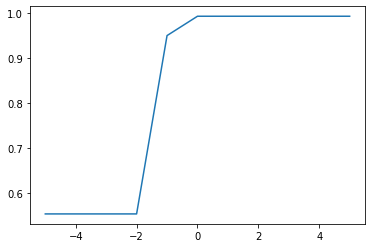

In [98]:
plt.plot(np.log10(grid['C']),gs.cv_results_['mean_test_score'])
plt.show()

**4. Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.**

In [32]:
clf = SVC(C=1 ,kernel='linear', random_state=241)
clf.fit(X_tf_idf, y)

SVC(C=1, kernel='linear', random_state=241)

**5. Найдите 10 слов с наибольшим *абсолютным* значением веса (веса хранятся в поле coef_ у svm.SVC). Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, в лексикографическом порядке.**

In [120]:
feature_mapping = tf_idf.get_feature_names_out()
svm_coef = [abs(i) for i in clf.coef_.toarray()[0]]
topn = sorted(zip(svm_coef, feature_mapping))[-10:]
print(','.join(sorted([i[1] for i in topn])))
for coef, feat in topn:
    print (feat, coef)

atheism,atheists,bible,god,keith,moon,religion,sci,sky,space
sci 1.0293069271856938
keith 1.0970936466401477
bible 1.1306123446649008
religion 1.13908083789883
sky 1.1801315951388636
moon 1.201611181752071
atheists 1.2491800073760078
atheism 1.2546899512384038
god 1.9203794002294927
space 2.6631647884797105


In [122]:
with open('../SVM_text/1.txt', 'w') as f:
    f.write("atheism,atheists,bible,god,keith,moon,religion,sci,sky,space")
f.close()